# Read stack of dm3 image files

This notebook reads a stack of **.dm3** microscopy images for analysis.

Created April 8, 2020
author: ericmuckley@gmail.com

In [1]:
import os
import cv2
import numpy as np
import scipy.fftpack as fp
import matplotlib.pyplot as plt
from skimage.transform import rescale
from scipy.ndimage.filters import gaussian_filter

# set numpy random seed for reproducible results
np.random.seed(0)

# this is the library for reading the dm3 files
# install this using 'pip install ncempy'
from ncempy.io import dm

# these are custom methods in a .py file in the same directory
import microscopy_methods as mm

### Identify the image stack file and read it

In [2]:
# identify the image stack filename
stack_filename = 'stack_pure_ZrO2-24%_25%_10_pics_each_26%_after_200us_1Hz.dm3'

# get path of the image stack file if it is in the same directory
stack_path = os.path.join(os.getcwd(), stack_filename)

# try to read stack data
try:
    d = mm.read_stack(stack_path)
    
    # examine the data
    for key in d:
        print('{}: {}'.format(key, d[key]))

# if stack file does not exist
except FileNotFoundError:
    print('\n\nCANNOT FIND STACKED IMAGE FILE.')
    print('Please place it in same directory as "read_stack.ipynb"')
    print('and set the correct "stack_filename".')

filename: stack_pure_ZrO2-24%_25%_10_pics_each_26%_after_200us_1Hz.dm3
data: [[[1127 1197 1230 ... 1749 1662 1651]
  [ 996 1095 1164 ... 1703 1642 1661]
  [1134 1127 1158 ... 1741 1708 1618]
  ...
  [1565 1786 1770 ... 1676 1726 1721]
  [1688 1869 1777 ... 1764 1722 1838]
  [1707 1824 1660 ... 1717 1684 1750]]

 [[1136 1067 1289 ... 1691 1762 1698]
  [1096 1118 1231 ... 1725 1463 1549]
  [1193 1234 1206 ... 1656 1557 1513]
  ...
  [1491 1498 1473 ... 1570 1616 1491]
  [1534 1564 1524 ... 1711 1560 1491]
  [1711 1654 1567 ... 1658 1547 1483]]

 [[1570 1553 1651 ... 1602 1679 1633]
  [1815 1645 1679 ... 1653 1737 1750]
  [1781 1682 1705 ... 1722 1694 1741]
  ...
  [1796 1693 1608 ... 1449 1411 1465]
  [1792 1680 1564 ... 1604 1426 1316]
  [1604 1591 1493 ... 1616 1546 1515]]

 ...

 [[1377 1533 1604 ... 1407 1474 1680]
  [1309 1381 1454 ... 1410 1435 1597]
  [1273 1295 1311 ... 1567 1580 1556]
  ...
  [1425 1528 1531 ... 1689 1647 1635]
  [1512 1721 1587 ... 1538 1660 1677]
  [1642 1721 

### Show images in the stack

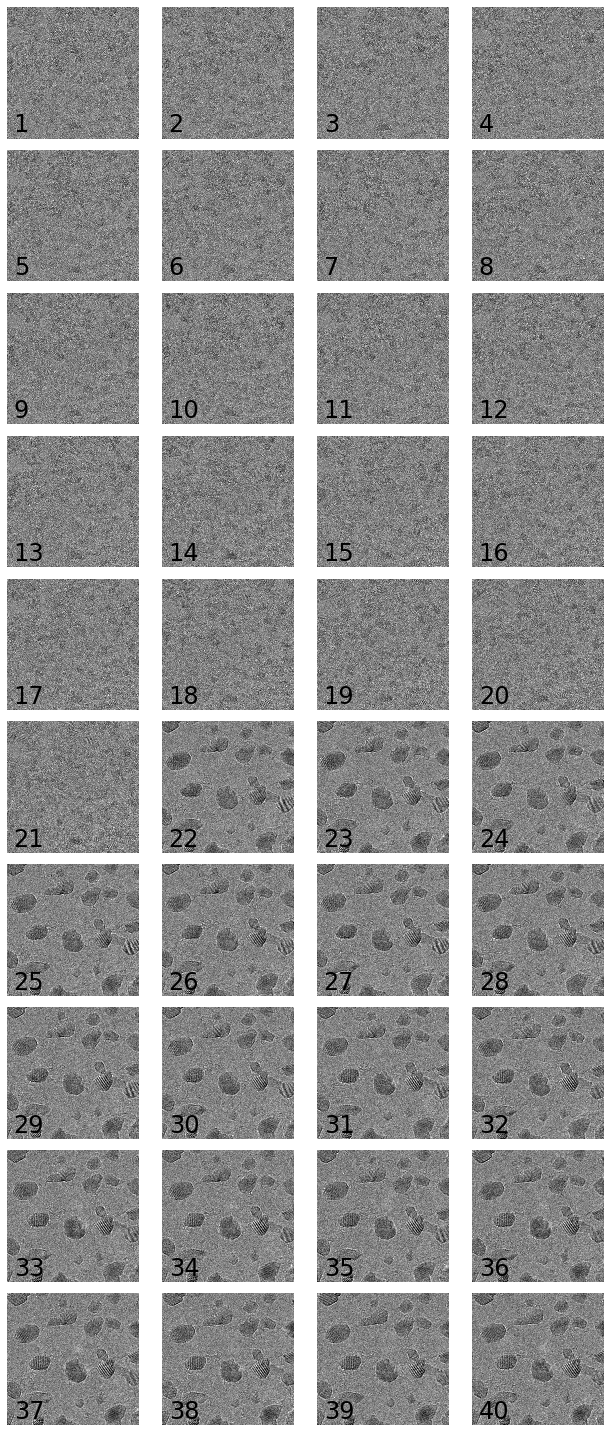

In [10]:
mm.show_image_stack(d)

### Test gaussian filtering and domain identification algorithms

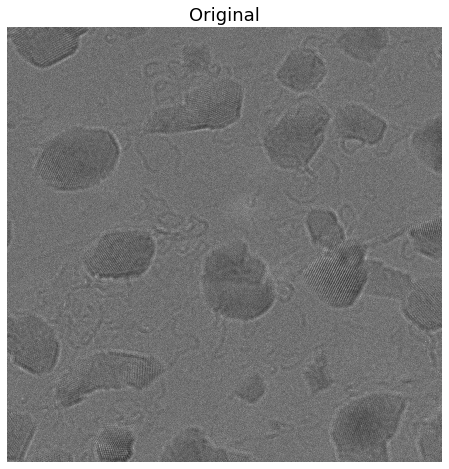

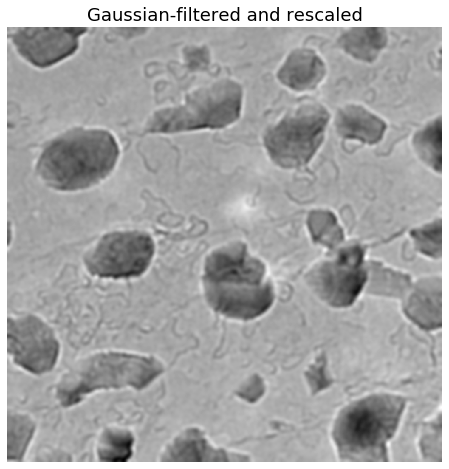

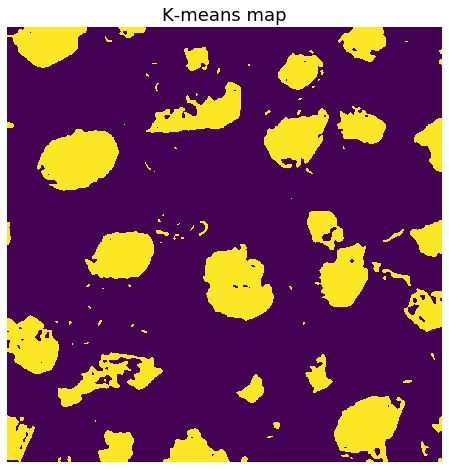

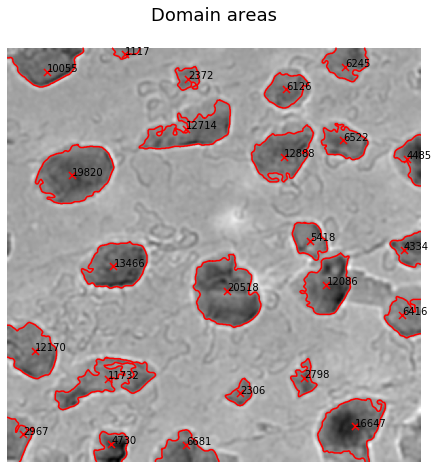

Detected 24 domains with mean area of 8525.5 pixels
Total image area (pixels): 1048576
Total domain area (pixels): 204611
Total domain area (%): 19.5


In [4]:
# show original image
img = d['data'][-1,:,:]
plt.imshow(img, cmap='gray', origin='lower')
mm.plot_setup(axes_on=False, title='Original')
plt.show()

# gaussian filter and rescale image
filt = gaussian_filter(img, sigma=8)
filt_s = rescale(filt, 0.5, mode="reflect")
plt.imshow(filt_s, cmap='gray', origin='lower')
mm.plot_setup(axes_on=False, title='Gaussian-filtered and rescaled')
plt.show()

# perform k-means clustering to identify domain areas
kmeans_map = mm.get_kmeans_map(filt_s)
plt.imshow(kmeans_map, origin='lower')
mm.plot_setup(axes_on=False, title='K-means map')
plt.show()

# use k-means map to get crystal domain information
domains = mm.get_domains(kmeans_map, min_area=800, max_area=40000)
plt.imshow(filt_s, cmap='gray', origin='lower')
mm.plot_domains(domains)
mm.plot_setup(axes_on=False, title='Domain areas')
plt.show()

# show domain statistics
mm.print_domain_info(domains)

### Run domain analysis on entire image stack

In [5]:
'''
# loop over images in stack
for n in range(0, d['data'].shape[0], 5):

    # get image
    img = d['data'][n,:,:]
    # gaussian filter and rescale image
    filt = gaussian_filter(img, sigma=8)
    filt_s = rescale(filt, 0.5, mode="reflect")

    # perform k-means clustering to identify domain areas
    kmeans_map = mm.get_kmeans_map(filt_s)
    # use k-means map to get crystal domain information
    domains = mm.get_domains(kmeans_map, min_area=800, max_area=40000)

    plt.imshow(filt_s, cmap='gray', origin='lower')
    # loop over each domain and overlay it on image
    for i in range(len(domains['areas'])):
        # plot contour line
        plt.plot(domains['contours'][i][:,0], domains['contours'][i][:,1], c='r', linewidth=1.5)
        # show area of domain
        plt.text(domains['mean_x'][i], domains['mean_y'][i], str(round(domains['areas'][i])))
        plt.scatter(domains['mean_x'][i], domains['mean_y'][i], marker='x', c='r', s=50)
    mm.plot_setup(axes_on=False, title='Image #{} domain areas'.format(str(n)))
    plt.show()
    
    mm.print_domain_info_(domains)
    print('=========================================================================')
'''

'\n# loop over images in stack\nfor n in range(0, d[\'data\'].shape[0], 5):\n\n    # get image\n    img = d[\'data\'][n,:,:]\n    # gaussian filter and rescale image\n    filt = gaussian_filter(img, sigma=8)\n    filt_s = rescale(filt, 0.5, mode="reflect")\n\n    # perform k-means clustering to identify domain areas\n    kmeans_map = mm.get_kmeans_map(filt_s)\n    # use k-means map to get crystal domain information\n    domains = mm.get_domains(kmeans_map, min_area=800, max_area=40000)\n\n    plt.imshow(filt_s, cmap=\'gray\', origin=\'lower\')\n    # loop over each domain and overlay it on image\n    for i in range(len(domains[\'areas\'])):\n        # plot contour line\n        plt.plot(domains[\'contours\'][i][:,0], domains[\'contours\'][i][:,1], c=\'r\', linewidth=1.5)\n        # show area of domain\n        plt.text(domains[\'mean_x\'][i], domains[\'mean_y\'][i], str(round(domains[\'areas\'][i])))\n        plt.scatter(domains[\'mean_x\'][i], domains[\'mean_y\'][i], marker=\'x\', c=\

### Create sliding window for image analysis

In [6]:
# set size in pixels of sliding window to sample and oversample
samples = 15
oversamples = 25

# get index slices for sampled and oversampled windows
img = d['data'][0,:,:]
slices = mm.get_window_slices(img, samples, oversamples)
print('Created {} sampling windows across {} pixel image'.format(
    len(slices['s']), img.shape))

Created 18769 sampling windows across (2048, 2048) pixel image


### Apply sliding window for image analysis

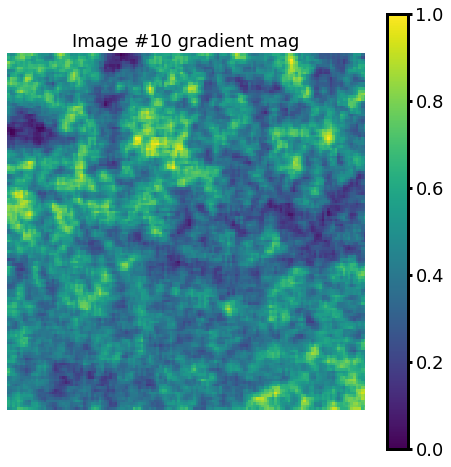

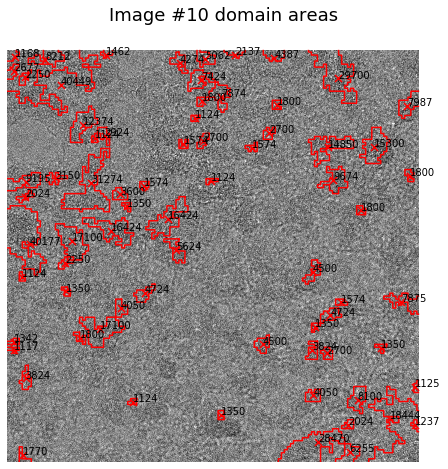

Detected 72 domains with mean area of 6836.8 pixels
Total image area (pixels): 4194304
Total domain area (pixels): 492249
Total domain area (%): 11.7


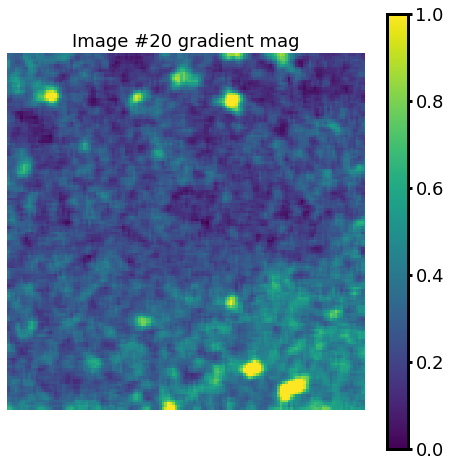

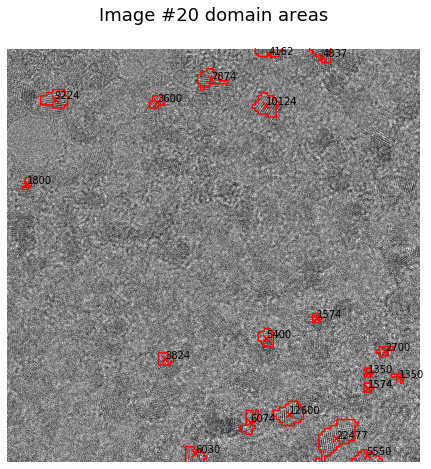

Detected 19 domains with mean area of 5901.3 pixels
Total image area (pixels): 4194304
Total domain area (pixels): 112124
Total domain area (%): 2.7


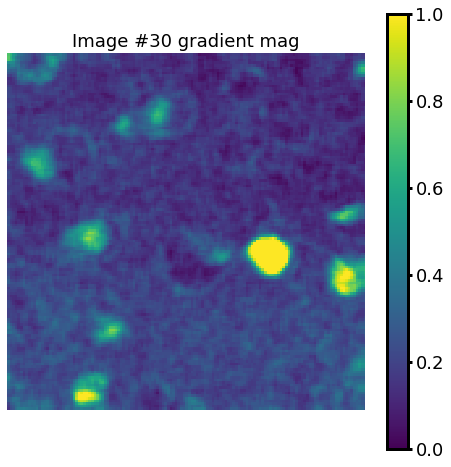

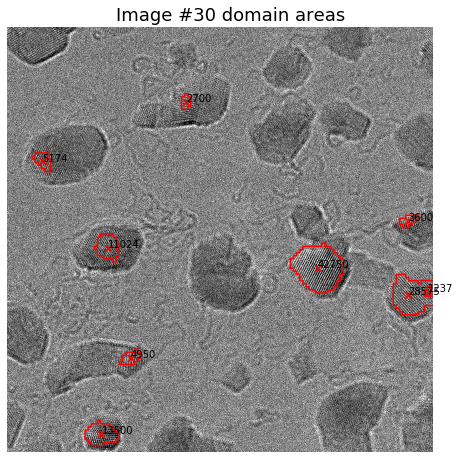

Detected 9 domains with mean area of 12612.1 pixels
Total image area (pixels): 4194304
Total domain area (pixels): 113508
Total domain area (%): 2.7


In [9]:
# loop over specified images in the image stack
for i in [10, 20, 30]:#0, d['data'].shape[0], 10):
    
    # select the image and normalize its intensity from 0 to 1
    img = mm.norm_image(d['data'][i, :, :])

    # create dictionary of calculated image layers to overlay on original image
    layers = mm.map_image(img, slices)
    
    # get the local gradient magnitude and set threshold for what counts as a domain
    grad_mag = mm.norm_image(layers['gradient_mag'])
    mag = np.where(grad_mag >= 0.6, 1, 0)
    
    
    plt.imshow(grad_mag, origin='lower', camp='jet')
    plt.colorbar()
    mm.plot_setup(title='Image #{} gradient mag'.format(i), axes_on=False)
    plt.show()
    plt.show()
    
    # get domain information
    domains = mm.get_domains(mag, min_area=1000)
    plt.imshow(img, origin='lower', cmap='gray')
    mm.plot_domains(domains)
    mm.plot_setup(title='Image #{} domain areas'.format(i), axes_on=False)
    plt.show()
    # show domain statistics
    mm.print_domain_info(domains)

### Perform FFT

In [ ]:
'''
# perform 2D FFT
img = mm.norm_image(d['data'][-1,:,:])
fft_full = fp.fftshift(fp.fft2((img).astype(float)))
fft_re = mm.norm_image(np.abs(np.real(fft_full)))
fft_im = mm.norm_image(np.abs(np.imag(fft_full)))

plt.imshow(img)
plt.show()

plt.imshow(fft_re)
plt.colorbar()
plt.show()
'''

In [ ]:
fft_re.min(0

### Show image with masked domains

In [ ]:
'''
masked_label = np.ma.masked_where(label > 10, label)

plt.imshow(filt_img, cmap='gray')
plt.imshow(masked_label, alpha=0.5, cmap='jet')
plt.show()
'''

### Perform PCA for domain identification

In [ ]:
'''
from sklearn.decomposition import PCA
# Make an instance of the Model

# plot original image
plt.imshow(d['data'][0,:,:], origin='lower')
plt.show()


img0 = d['data'][0,:,:]
img1 = d['data'][21,:,:]
img2 = d['data'][-1,:,:]

imgs = [img0, img1, img2]

# run PCA on 
pca = PCA(n_components=0.6)
pca.fit(mm.norm_image(img2))

for idx, i in enumerate(imgs):

    components = pca.transform(mm.norm_image(i))
    projected = pca.inverse_transform(components)
    plt.title(str(idx))
    plt.imshow(projected, origin='lower')
    plt.show()
'''